In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import requests

In [2]:
def get_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-12-01').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    
    return df

In [45]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT','FLOW']

In [4]:
for i in tokens:
    df = get_data(i)
    print(i)

ETH
SOL
AVAX
USDT


KeyError: 'result'

In [5]:
# Thus, we only use 4 tokens here
df = pd.concat(get_data(token) for token in tokens[0:4])

In [79]:
df

,ts,open,high,low,close,volumeBase,volumeTerm,token
0,2021-12-01 00:00:00,4656.6200,4672.4300,4624.1600,4634.9500,6.013007e+03,2.793321e+07,ETH
1,2021-12-01 01:00:00,4636.4300,4736.9000,4605.4900,4729.1000,1.381906e+04,6.487693e+07,ETH
2,2021-12-01 02:00:00,4729.1000,4729.1000,4684.4900,4695.7800,7.491465e+03,3.524161e+07,ETH
3,2021-12-01 03:00:00,4695.7800,4754.9700,4672.3000,4754.0900,1.053083e+04,4.963273e+07,ETH
4,2021-12-01 04:00:00,4754.0900,4774.7400,4722.0200,4764.5900,1.247162e+04,5.924627e+07,ETH
...,...,...,...,...,...,...,...,...
555,2021-12-24 03:00:00,1.0005,1.0005,1.0004,1.0004,2.446536e+06,2.447670e+06,USDT
556,2021-12-24 04:00:00,1.0004,1.0005,1.0003,1.0005,3.099948e+06,3.101293e+06,USDT
557,2021-12-24 05:00:00,1.0005,1.0005,1.0004,1.0005,2.113135e+06,2.114097e+06,USDT
558,2021-12-24 06:00:00,1.0005,1.0005,1.0004,1.0005,1.658946e+06,1.659654e+06,USDT


In [7]:
df.groupby(['token']).sum().sort_values(by='volumeUSD',ascending=False)

,open,high,low,close,volume,volumeUSD
token,,,,,,
ETH,2.299643e+06,2314545.030,2.282928e+06,2.299068e+06,5.047853e+06,2.066856e+10
SOL,1.041971e+05,105224.618,1.031460e+05,1.041738e+05,3.601979e+07,6.737731e+09
AVAX,5.624414e+04,56911.820,5.554976e+04,5.624275e+04,3.530068e+07,3.529548e+09
USDT,5.603499e+02,560.467,5.602802e+02,5.603525e+02,1.641660e+09,1.643100e+09


In [27]:
def get_spec_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-12-01').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    nn = 'close'+token
    print(nn)
    df = df.rename(columns={'close': nn})
    
    return df

In [30]:
#close price ratio
df_1 = get_spec_data(tokens[0])
for i in tokens[1:4]:
    tmp = get_spec_data(i)
    df_1 = df_1.merge(tmp, on='ts')

closeETH
closeSOL
closeAVAX
closeUSDT


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'low_x', 'high_x', 'volumeUSD_x', 'open_x', 'volume_x', 'token_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [33]:
df_1.head(5)

,ts,open_x,high_x,low_x,closeETH,volume_x,volumeUSD_x,token_x,open_y,high_y,...,volume_x,volumeUSD_x,token_x,open_y,high_y,low_y,closeUSDT,volume_y,volumeUSD_y,token_y
0,2021-12-01 00:00:00,4656.62,4672.43,4624.16,4634.95,6013.006735,2.793321e+07,ETH,210.312,210.590,...,58982.875,7.178868e+06,AVAX,1.0008,1.0009,1.0008,1.0008,1588401.81,1.589782e+06,USDT
1,2021-12-01 01:00:00,4636.43,4736.90,4605.49,4729.10,13819.061610,6.487693e+07,ETH,208.716,211.773,...,66106.301,8.146064e+06,AVAX,1.0008,1.0009,1.0008,1.0009,3429521.89,3.432551e+06,USDT
2,2021-12-01 02:00:00,4729.10,4729.10,4684.49,4695.78,7491.465440,3.524161e+07,ETH,211.506,212.235,...,80354.716,1.008255e+07,AVAX,1.0009,1.0009,1.0008,1.0008,2136351.34,2.138192e+06,USDT
3,2021-12-01 03:00:00,4695.78,4754.97,4672.30,4754.09,10530.834423,4.963273e+07,ETH,210.889,215.063,...,82091.857,1.023314e+07,AVAX,1.0009,1.0010,1.0008,1.0008,2974174.19,2.976933e+06,USDT
4,2021-12-01 04:00:00,4754.09,4774.74,4722.02,4764.59,12471.624735,5.924627e+07,ETH,214.148,215.232,...,91628.118,1.146038e+07,AVAX,1.0009,1.0010,1.0008,1.0008,4970508.62,4.975224e+06,USDT


In [36]:
df_1['ETH/SOL_close'] = df_1['closeETH']/df_1['closeSOL']

In [37]:
df_1

,ts,open_x,high_x,low_x,closeETH,volume_x,volumeUSD_x,token_x,open_y,high_y,...,volumeUSD_x,token_x,open_y,high_y,low_y,closeUSDT,volume_y,volumeUSD_y,token_y,ETH/SOL_close
0,2021-12-01 00:00:00,4656.62,4672.43,4624.16,4634.95,6013.006735,2.793321e+07,ETH,210.312,210.590,...,7.178868e+06,AVAX,1.0008,1.0009,1.0008,1.0008,1588401.81,1.589782e+06,USDT,22.211227
1,2021-12-01 01:00:00,4636.43,4736.90,4605.49,4729.10,13819.061610,6.487693e+07,ETH,208.716,211.773,...,8.146064e+06,AVAX,1.0008,1.0009,1.0008,1.0009,3429521.89,3.432551e+06,USDT,22.359071
2,2021-12-01 02:00:00,4729.10,4729.10,4684.49,4695.78,7491.465440,3.524161e+07,ETH,211.506,212.235,...,1.008255e+07,AVAX,1.0009,1.0009,1.0008,1.0008,2136351.34,2.138192e+06,USDT,22.268813
3,2021-12-01 03:00:00,4695.78,4754.97,4672.30,4754.09,10530.834423,4.963273e+07,ETH,210.889,215.063,...,1.023314e+07,AVAX,1.0009,1.0010,1.0008,1.0008,2974174.19,2.976933e+06,USDT,22.199813
4,2021-12-01 04:00:00,4754.09,4774.74,4722.02,4764.59,12471.624735,5.924627e+07,ETH,214.148,215.232,...,1.146038e+07,AVAX,1.0009,1.0010,1.0008,1.0008,4970508.62,4.975224e+06,USDT,22.142758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2021-12-24 03:00:00,4123.87,4130.55,4100.49,4100.89,4720.245768,1.943295e+07,ETH,190.610,190.850,...,4.392272e+06,AVAX,1.0005,1.0005,1.0004,1.0004,2446535.68,2.447670e+06,USDT,21.753077
556,2021-12-24 04:00:00,4100.50,4105.92,4077.71,4093.08,3777.262595,1.545906e+07,ETH,188.530,188.920,...,4.352613e+06,AVAX,1.0004,1.0005,1.0003,1.0005,3099948.16,3.101293e+06,USDT,21.799531
557,2021-12-24 05:00:00,4092.52,4102.09,4090.39,4090.93,2389.454047,9.789052e+06,ETH,187.760,189.080,...,2.287795e+06,AVAX,1.0005,1.0005,1.0004,1.0005,2113135.02,2.114097e+06,USDT,21.763739
558,2021-12-24 06:00:00,4090.86,4097.63,4077.92,4091.96,2915.758237,1.192272e+07,ETH,188.020,188.620,...,2.683769e+06,AVAX,1.0005,1.0005,1.0004,1.0005,1658946.36,1.659654e+06,USDT,21.812154


In [40]:
# change name
df = df.rename(columns={'volume': 'volumeBase', "volumeUSD": "volumeTerm"})

In [41]:
df

,ts,open,high,low,close,volumeBase,volumeTerm,token
0,2021-12-01 00:00:00,4656.6200,4672.4300,4624.1600,4634.9500,6.013007e+03,2.793321e+07,ETH
1,2021-12-01 01:00:00,4636.4300,4736.9000,4605.4900,4729.1000,1.381906e+04,6.487693e+07,ETH
2,2021-12-01 02:00:00,4729.1000,4729.1000,4684.4900,4695.7800,7.491465e+03,3.524161e+07,ETH
3,2021-12-01 03:00:00,4695.7800,4754.9700,4672.3000,4754.0900,1.053083e+04,4.963273e+07,ETH
4,2021-12-01 04:00:00,4754.0900,4774.7400,4722.0200,4764.5900,1.247162e+04,5.924627e+07,ETH
...,...,...,...,...,...,...,...,...
555,2021-12-24 03:00:00,1.0005,1.0005,1.0004,1.0004,2.446536e+06,2.447670e+06,USDT
556,2021-12-24 04:00:00,1.0004,1.0005,1.0003,1.0005,3.099948e+06,3.101293e+06,USDT
557,2021-12-24 05:00:00,1.0005,1.0005,1.0004,1.0005,2.113135e+06,2.114097e+06,USDT
558,2021-12-24 06:00:00,1.0005,1.0005,1.0004,1.0005,1.658946e+06,1.659654e+06,USDT


In [47]:
# fat table indexed by timestamp
use_cols=[]
for i in tokens[0:4]:
    use_cols.append('close'+i)
df_1.set_index('ts')[use_cols]

,closeETH,closeSOL,closeAVAX,closeUSDT
ts,,,,
2021-12-01 00:00:00,4634.95,208.676,121.22,1.0008
2021-12-01 01:00:00,4729.10,211.507,124.06,1.0009
2021-12-01 02:00:00,4695.78,210.868,127.09,1.0008
2021-12-01 03:00:00,4754.09,214.150,124.59,1.0008
2021-12-01 04:00:00,4764.59,215.176,125.72,1.0008
...,...,...,...,...
2021-12-24 03:00:00,4100.89,188.520,120.37,1.0004
2021-12-24 04:00:00,4093.08,187.760,119.96,1.0005
2021-12-24 05:00:00,4090.93,187.970,120.09,1.0005


In [60]:
# hour by hour log return 
for i in use_cols:
    df_1[i+'log_return'] = np.log2(df_1[i].diff()).fillna(0)

In [62]:
df_1.head(5)

,ts,open_x,high_x,low_x,closeETH,volume_x,volumeUSD_x,token_x,open_y,high_y,...,low_y,closeUSDT,volume_y,volumeUSD_y,token_y,ETH/SOL_close,closeETHlog_return,closeSOLlog_return,closeAVAXlog_return,closeUSDTlog_return
0,2021-12-01 00:00:00,4656.62,4672.43,4624.16,4634.95,6013.006735,2.793321e+07,ETH,210.312,210.590,...,1.0008,1.0008,1588401.81,1.589782e+06,USDT,22.211227,0.000000,0.000000,0.000000,0.000000
1,2021-12-01 01:00:00,4636.43,4736.90,4605.49,4729.10,13819.061610,6.487693e+07,ETH,208.716,211.773,...,1.0008,1.0009,3429521.89,3.432551e+06,USDT,22.359071,6.556889,1.501312,1.505891,-13.287712
2,2021-12-01 02:00:00,4729.10,4729.10,4684.49,4695.78,7491.465440,3.524161e+07,ETH,211.506,212.235,...,1.0008,1.0008,2136351.34,2.138192e+06,USDT,22.268813,0.000000,0.000000,1.599318,0.000000
3,2021-12-01 03:00:00,4695.78,4754.97,4672.30,4754.09,10530.834423,4.963273e+07,ETH,210.889,215.063,...,1.0008,1.0008,2974174.19,2.976933e+06,USDT,22.199813,5.865671,1.714575,0.000000,-inf
4,2021-12-01 04:00:00,4754.09,4774.74,4722.02,4764.59,12471.624735,5.924627e+07,ETH,214.148,215.232,...,1.0008,1.0008,4970508.62,4.975224e+06,USDT,22.142758,3.392317,0.037031,0.176323,-inf


In [73]:
# create a correlation matrix for 4 tokens
use_cols=[]
for i in tokens[0:4]:
    use_cols.append('close'+i+'log_return')

In [80]:
tmp = df_1[use_cols]
tmp.corr()

,closeETHlog_return,closeSOLlog_return,closeAVAXlog_return,closeUSDTlog_return
closeETHlog_return,1.000000,0.360286,0.142101,-0.129718
closeSOLlog_return,0.360286,1.000000,0.225572,-0.031212
closeAVAXlog_return,0.142101,0.225572,1.000000,-0.049257
closeUSDTlog_return,-0.129718,-0.031212,-0.049257,1.000000


<AxesSubplot:>

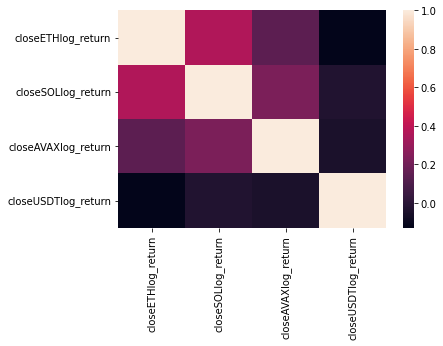

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(tmp.corr())